# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

Jonatas Duarte Souza

#### RA

11036516

## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [177]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

x = dataset.data
y = dataset.target

Mostre os formatos da variável de atributos e da variável de saídas.

In [178]:
x.shape

(442, 10)

In [179]:
y.shape

(442,)

## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [180]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold      import Isomap, TSNE

pca = PCA(1)
x_pca = pca.fit_transform(x)

fast_ica = FastICA(1)
x_fast_ica = fast_ica.fit_transform(x)

isomap = Isomap(n_components=1)
x_isomap = isomap.fit_transform(x)

tsne = TSNE(1)
x_tsne = tsne.fit_transform(x)

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [181]:
x_pca.shape

(442, 1)

In [182]:
x_fast_ica.shape

(442, 1)

In [183]:
x_isomap.shape

(442, 1)

In [184]:
x_tsne.shape

(442, 1)

### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [185]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [186]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

y_pred = linear_regression.predict(x_test)

Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [187]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

3600.7253866658098
0.29468458660847585


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

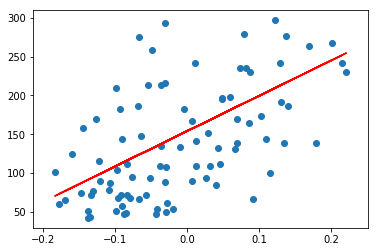

In [188]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

#### PCA

MSE:
min   :  2566.039924529799
max   :  6362.070859783521
med   :  4140.1796561951405
desvio:  478.62283043678997

R2:
min   :  -0.16957141578653423
max   :  0.5110249776629708
med   :  0.292937615157
desvio:  0.0720533965170172


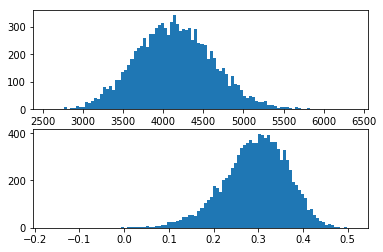

In [189]:
from statistics import mean, stdev

def test_metric(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    return mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

def get_metrics(x, y, n):
    mse = []
    r2  = []
    for _ in range(n):
        m, r = test_metric(x, y);
        mse.append(m)
        r2.append(r)
    return mse, r2

def print_stats(arr):
    print("min   : ", min(arr))
    print("max   : ", max(arr))
    print("med   : ", mean(arr))
    print("desvio: ", stdev(arr))

def print_metrics(x, y, n=10000):
    mse, r2 = get_metrics(x, y, n)
    print("MSE:")
    print_stats(mse)
    print()
    print("R2:")
    print_stats(r2)
    
    plt.subplot(2, 1, 1)
    plt.hist(mse, bins=100)
    plt.subplot(2, 1, 2)
    plt.hist(r2, bins=100)

print_metrics(x_pca, y)

#### ICA

MSE:
min   :  2614.093947932058
max   :  6190.421072794862
med   :  4139.44416775096
desvio:  476.9590940700311

R2:
min   :  -0.055476926104557345
max   :  0.53888064511576
med   :  0.29287858827012897
desvio:  0.07174866368991845


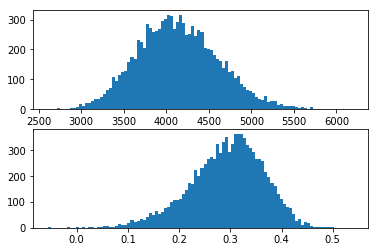

In [190]:
print_metrics(x_fast_ica, y)

#### Isomap

MSE:
min   :  3610.2843203500966
max   :  8054.786991710827
med   :  5623.0930291774885
desvio:  585.7955331157026

R2:
min   :  -0.2910343751186324
max   :  0.16390607772744403
med   :  0.043086558918732795
desvio:  0.04818015022938285


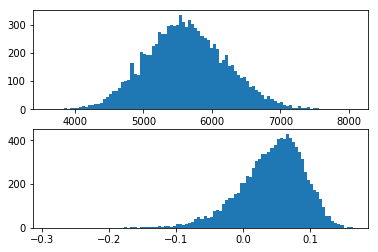

In [191]:
print_metrics(x_isomap, y)

#### TSNE

MSE:
min   :  3309.6612560915332
max   :  7523.521253790468
med   :  5292.993606642147
desvio:  569.1330065405774

R2:
min   :  -0.26323389408024833
max   :  0.2760498793765148
med   :  0.09770517592872428
desvio:  0.06019474637218322


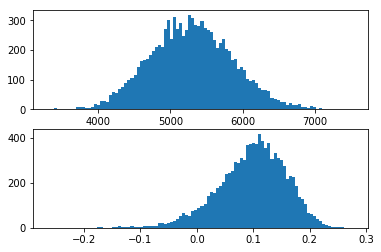

In [192]:
print_metrics(x_tsne, y)

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

#### Least Squares

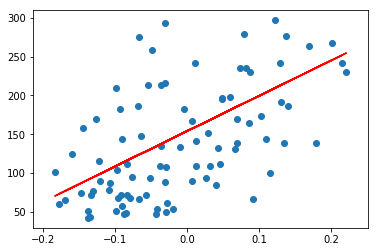

In [208]:
def test_model(model):
    m = model()
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, color='r')    

test_model(LinearRegression)

#### Ridge

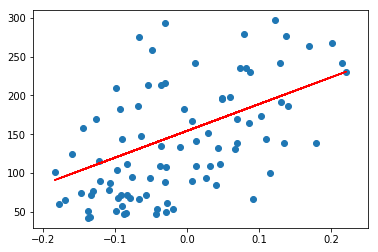

In [209]:
from sklearn.linear_model import Ridge

test_model(Ridge)

#### Lasso

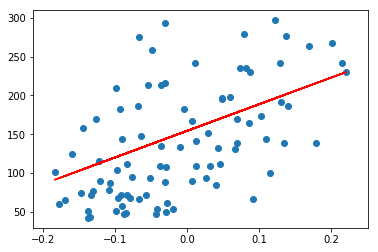

In [210]:
from sklearn.linear_model import Lasso

test_model(Lasso)

#### Lasso LARS

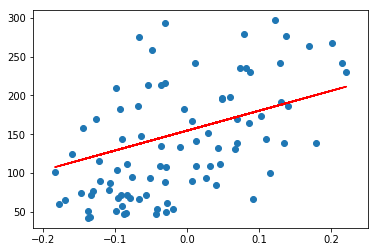

In [212]:
from sklearn.linear_model import LassoLars

test_model(LassoLars)

#### Bayesian Ridge

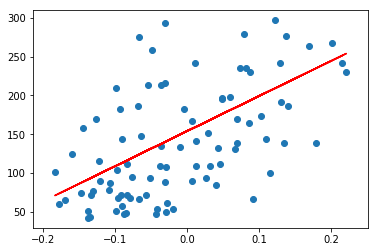

In [213]:
from sklearn.linear_model import BayesianRidge

test_model(BayesianRidge)

#### RANSAC

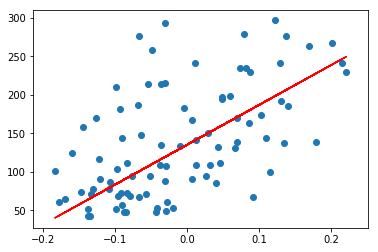

In [214]:
from sklearn.linear_model import RANSACRegressor

test_model(RANSACRegressor)

#### Theil-Sen

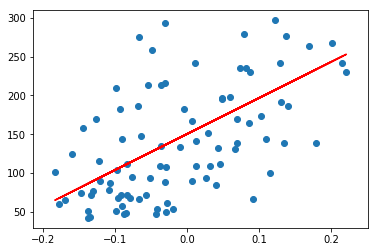

In [215]:
from sklearn.linear_model import TheilSenRegressor

test_model(TheilSenRegressor)

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

In [200]:
### Escreva seu código aqui ###